In [1]:
import numpy as np
import matplotlib.pyplot as plt
from poles_roots.aaa import AAA
from tqdm import tqdm
plt.style.use("/home/jakeb/development/poles-and-roots/notebooks/science.mplstyle")

For now we only consider right triangle of different sizes.

In [2]:
side_length = 1

points = np.array([[0,0], [side_length, 0], [0, side_length]])

def linspace_in_right_triangle(num, side_length):
    tmp = np.linspace(0, side_length, num=int(num**0.5))
    [xx, yy] = np.meshgrid(tmp, tmp)
    mask = xx + yy > side_length
    xx = xx[~mask]
    yy = yy[~mask]
    return xx.ravel(), yy.ravel()

In [3]:
rng = np.random.default_rng(123456)
f_iterations = []
log_deriv_iterations = []
f_pole_error = []
log_deriv_pole_error = []
orders = [1, 2, 4, 8]

for order in orders:
    f_iterations_tmp = []
    log_deriv_iterations_tmp = []
    f_pole_error_tmp = []
    log_deriv_pole_error_tmp = []
    for _ in tqdm(range(1000)):
        # generate random pole
        re_pole = rng.uniform(0, side_length)
        im_pole = rng.uniform(0, side_length)
        if re_pole + im_pole > side_length:
            re_pole = side_length - re_pole
            im_pole = side_length - im_pole   
        
        pole = re_pole+im_pole*1j
        def f(z):
            return 1/(z-pole)**order
        def f_prime(z):
            return -order/(z-pole)**(order+1)
        
        x, y = linspace_in_right_triangle(1000, side_length)
        Z_in = x+y*1j        
        n_actual = x.size
        
        f_res = AAA(f(Z_in), Z_in)
        log_deriv_res = AAA(f_prime(Z_in)/f(Z_in), Z_in)
        
        f_iterations_tmp.append(f_res.weights.size)
        log_deriv_iterations_tmp.append(log_deriv_res.weights.size)
        f_pole_error_tmp.append(np.min(np.abs(f_res.poles - pole)))
        log_deriv_pole_error_tmp.append(np.min(np.abs(log_deriv_res.poles - pole)))
        
        # generate random points to sample the approximation at
        re_sample = rng.uniform(0, side_length, size=10)
        im_sample = rng.uniform(0, side_length, size=10)
        mask = re_sample + im_sample > side_length
        re_sample[mask] = side_length - re_sample[mask]
        im_sample[mask] = side_length - im_sample[mask]
        sample = re_sample + im_sample*1j
    
    f_iterations.append(f_iterations_tmp)
    log_deriv_iterations.append(log_deriv_iterations_tmp)
    f_pole_error.append(f_pole_error_tmp)
    log_deriv_pole_error.append(log_deriv_pole_error_tmp)

100%|██████████| 1000/1000 [00:05<00:00, 190.54it/s]


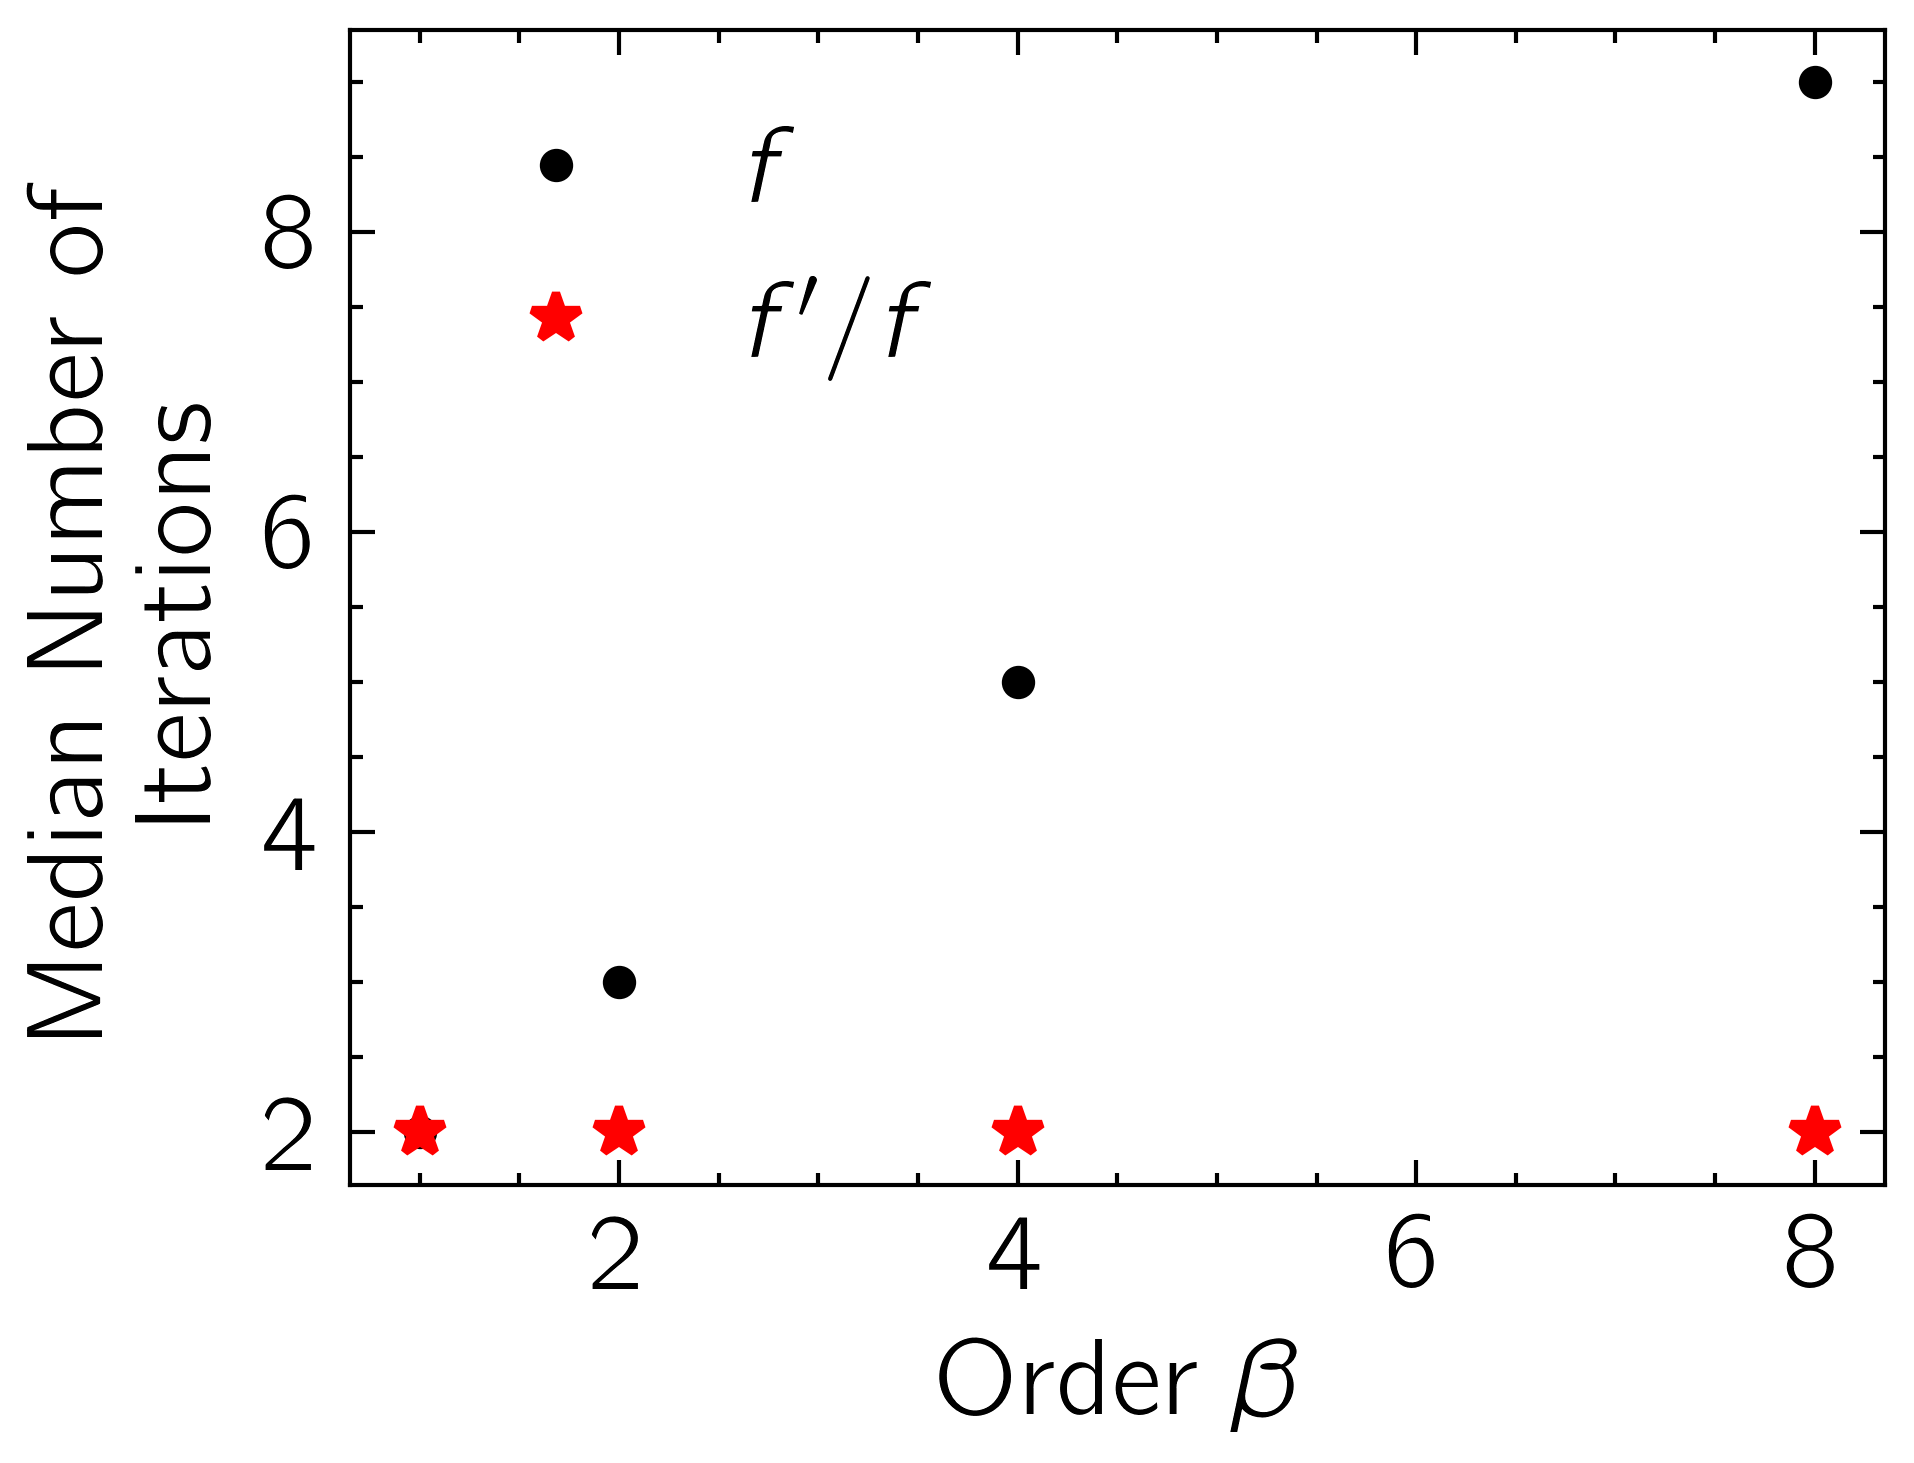

In [4]:
fig, ax = plt.subplots()
ax.plot(orders, np.median(f_iterations, axis=1), '.', label=r"$f$")
ax.plot(orders, np.median(log_deriv_iterations, axis=1), '*', label=r"$f^\prime/f$")
ax.set_xlabel(rf"Order $\beta$")
ax.set_ylabel("Median Number of\nIterations")
ax.legend()
plt.savefig("figures/AAA_function_choice_iterations.pdf")

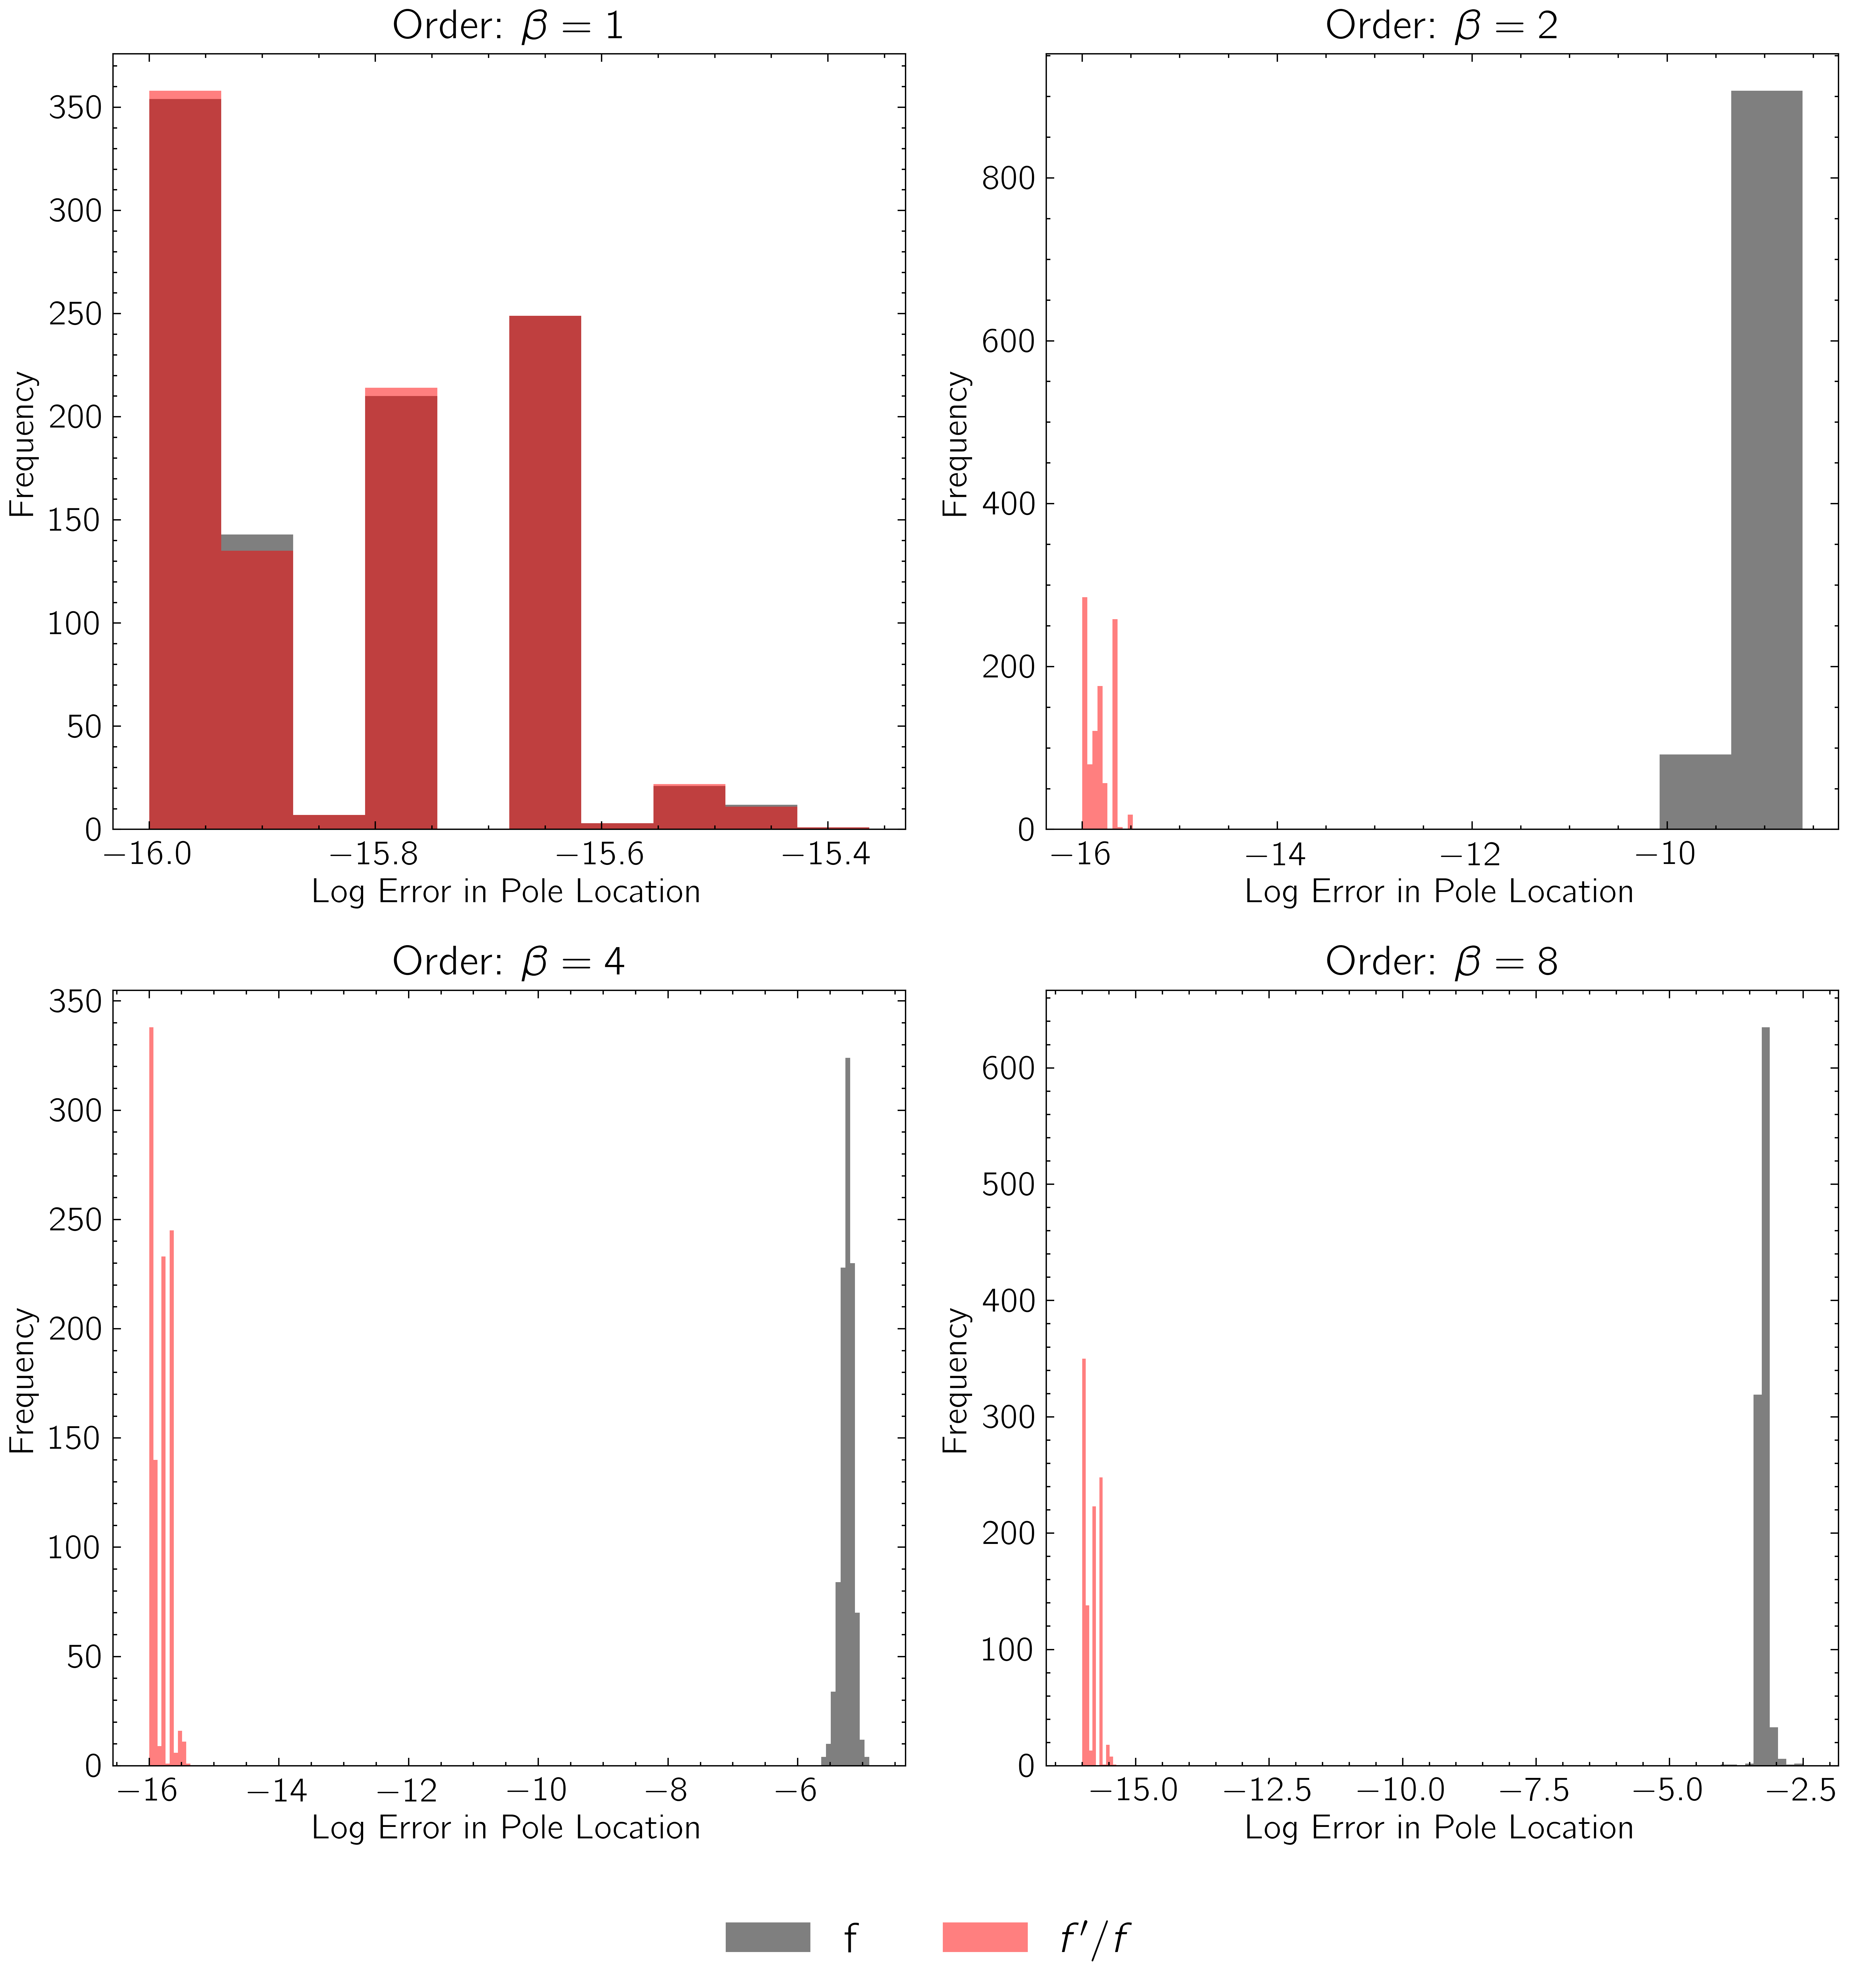

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, (ax, order) in enumerate(zip(axs.ravel(), orders)):
    ax.hist(np.log10(np.asarray(f_pole_error[i])+1e-16), alpha=0.5, label="f")
    ax.hist(np.log10(np.asarray(log_deriv_pole_error[i])+1e-16), alpha=0.5, label=r"$f^\prime/f$")
    ax.set_xlabel("Log Error in Pole Location")
    ax.set_ylabel("Frequency")
    ax.set_title(rf"Order: $\beta={order}$")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0),
           fancybox=True, shadow=True, ncol=4, fontsize=16)
plt.tight_layout()
plt.savefig("figures/AAA_sampling.pdf")
plt.savefig("figures/AAA_function_choice_error.pdf")

In [6]:
rng = np.random.default_rng(123456)
f_iterations = []
log_deriv_iterations = []
f_pole_error = []
log_deriv_pole_error = []
orders = [1, 2, 4, 8]

for order in orders:
    f_iterations_tmp = []
    log_deriv_iterations_tmp = []
    f_pole_error_tmp = []
    log_deriv_pole_error_tmp = []
    for _ in tqdm(range(1000)):
        # generate random pole
        re_pole = rng.uniform(0, side_length)
        im_pole = rng.uniform(0, side_length)
        if re_pole + im_pole > side_length:
            re_pole = side_length - re_pole
            im_pole = side_length - im_pole   
        
        pole = re_pole+im_pole*1j
        def f(z):
            return (z-pole)**order
        def f_prime(z):
            return order*(z-pole)**(order-1)
        
        x, y = linspace_in_right_triangle(1000, side_length)
        Z_in = x+y*1j        
        n_actual = x.size
        
        f_res = AAA(f(Z_in), Z_in)
        log_deriv_res = AAA(f_prime(Z_in)/f(Z_in), Z_in)
        
        f_iterations_tmp.append(f_res.weights.size)
        log_deriv_iterations_tmp.append(log_deriv_res.weights.size)
        f_pole_error_tmp.append(np.min(np.abs(f_res.roots - pole)))
        log_deriv_pole_error_tmp.append(np.min(np.abs(log_deriv_res.poles - pole)))
        
        # generate random points to sample the approximation at
        re_sample = rng.uniform(0, side_length, size=10)
        im_sample = rng.uniform(0, side_length, size=10)
        mask = re_sample + im_sample > side_length
        re_sample[mask] = side_length - re_sample[mask]
        im_sample[mask] = side_length - im_sample[mask]
        sample = re_sample + im_sample*1j
    
    f_iterations.append(f_iterations_tmp)
    log_deriv_iterations.append(log_deriv_iterations_tmp)
    f_pole_error.append(f_pole_error_tmp)
    log_deriv_pole_error.append(log_deriv_pole_error_tmp)

100%|██████████| 1000/1000 [00:04<00:00, 240.50it/s]


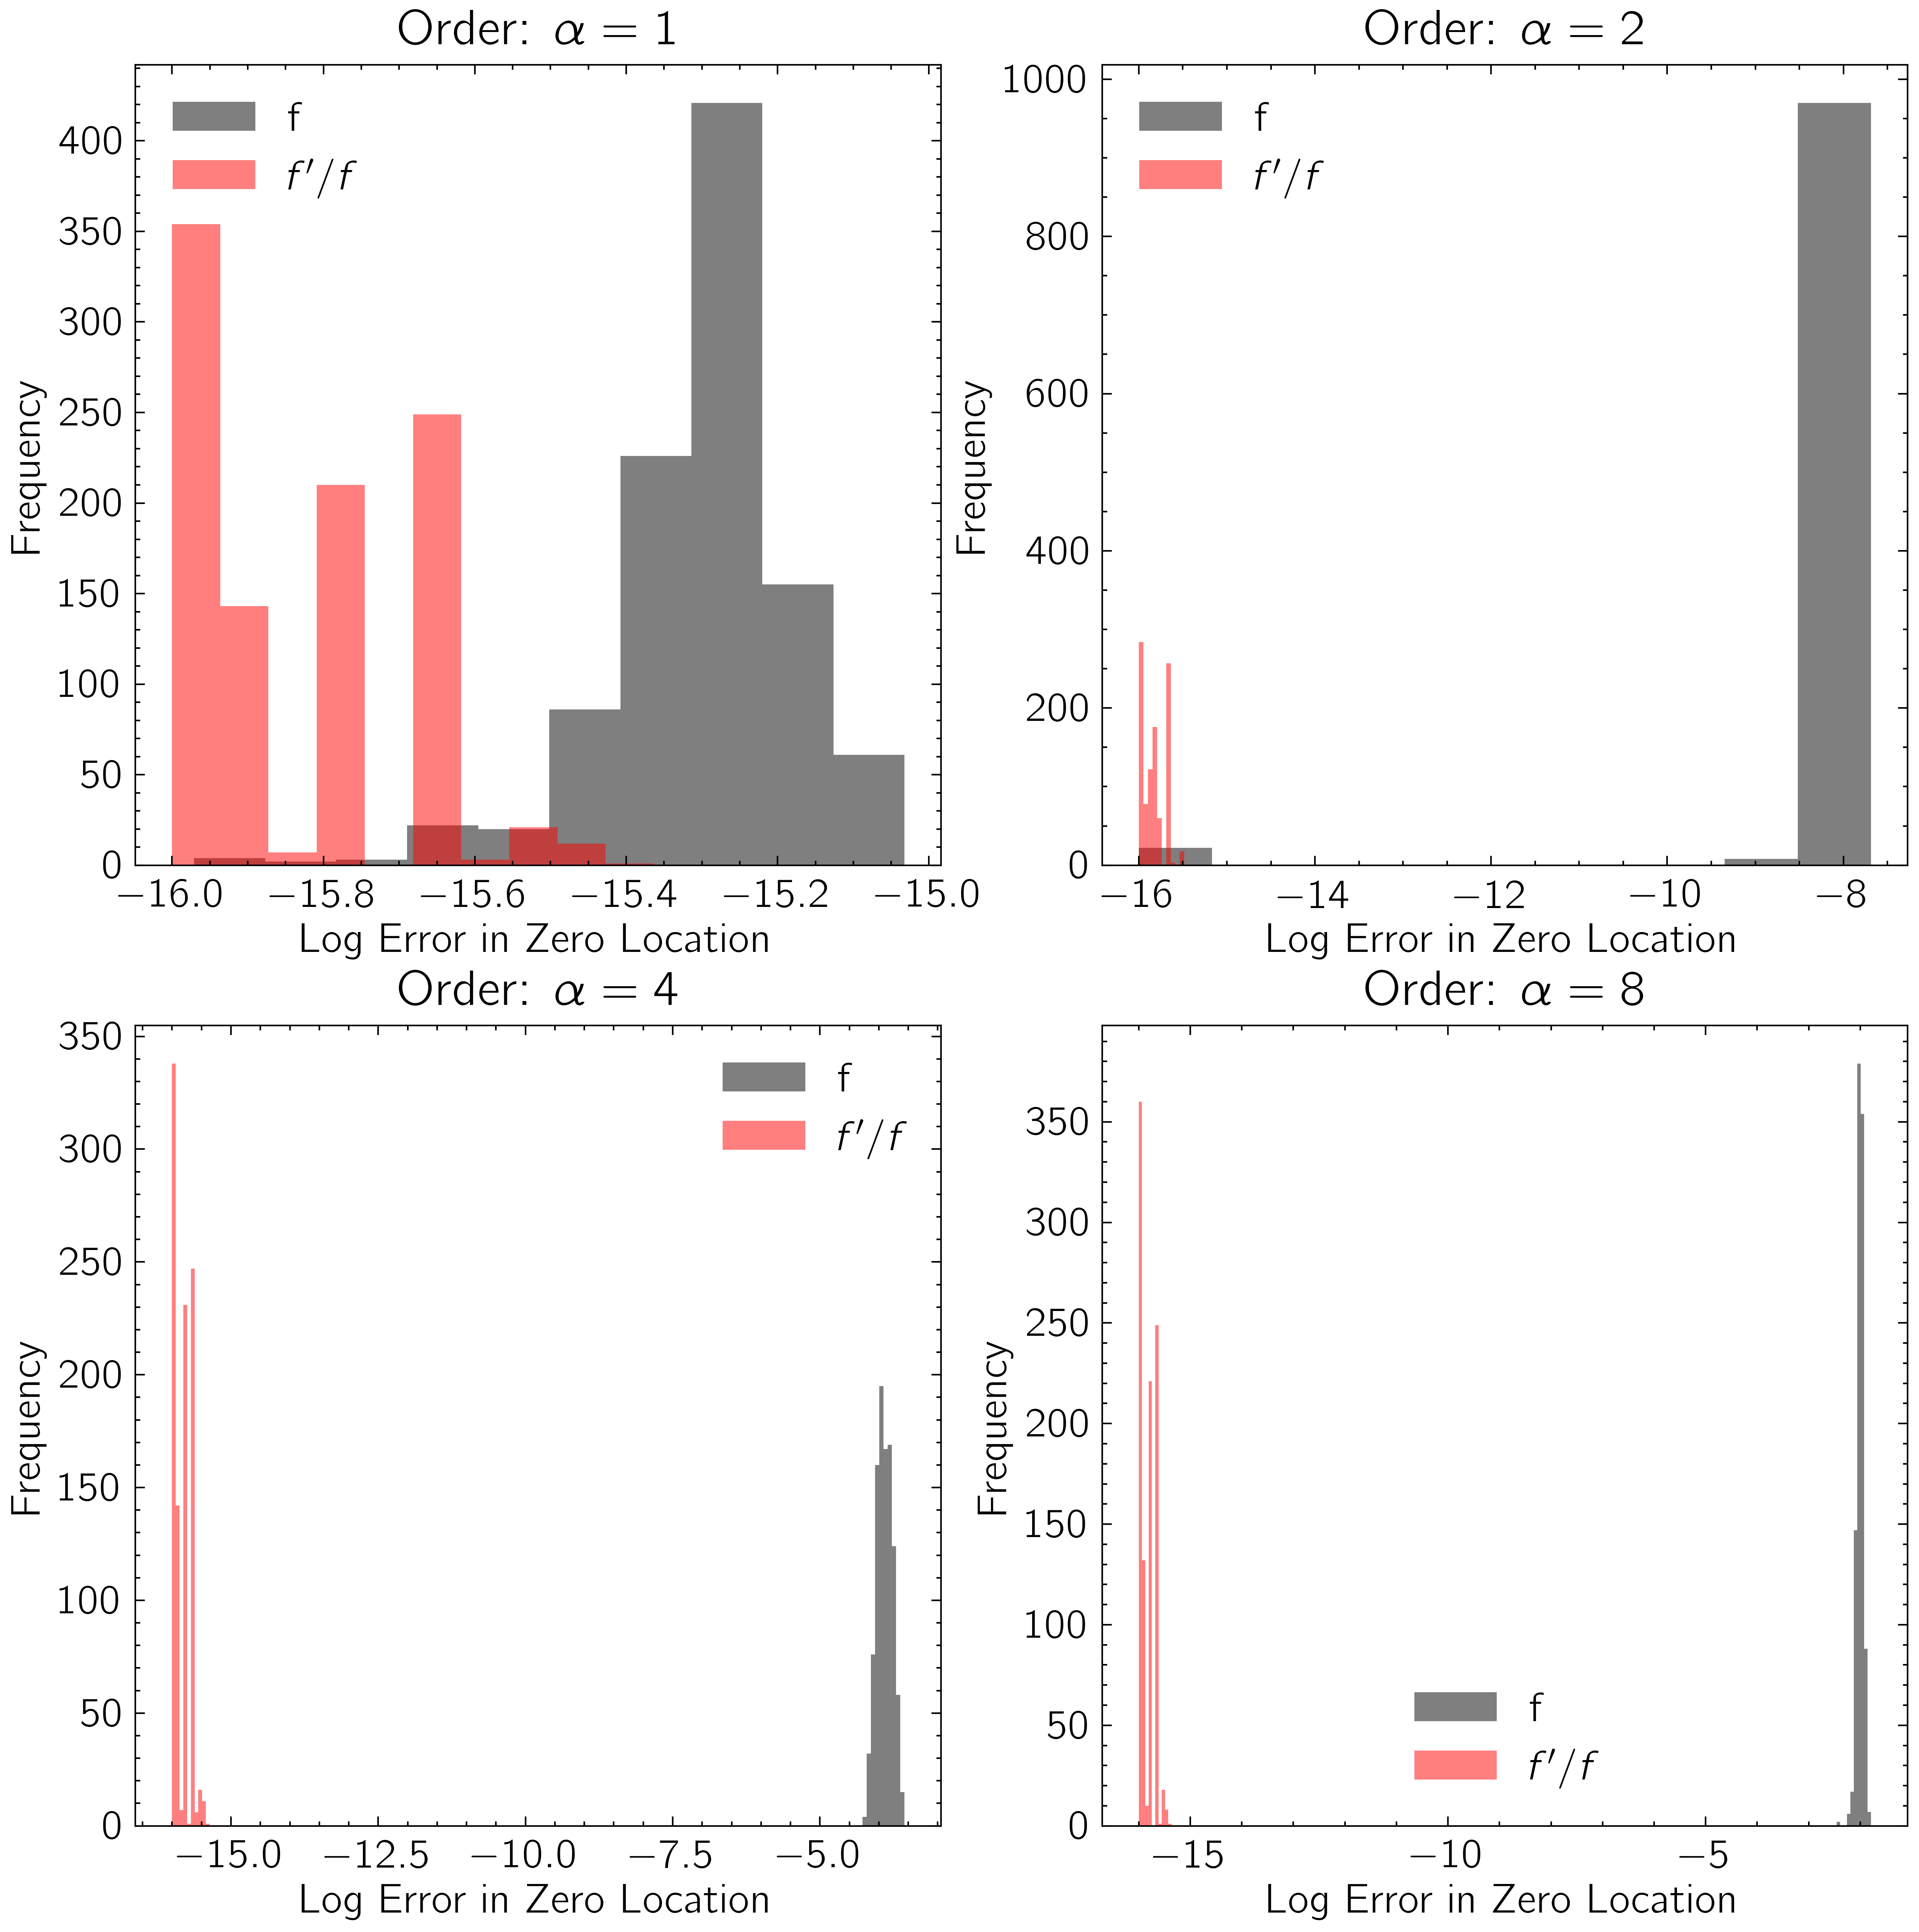

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, (ax, order) in enumerate(zip(axs.ravel(), orders)):
    ax.hist(np.log10(np.asarray(f_pole_error[i])+1e-16), alpha=0.5, label="f")
    ax.hist(np.log10(np.asarray(log_deriv_pole_error[i])+1e-16), alpha=0.5, label=r"$f^\prime/f$")
    ax.set_xlabel("Log Error in Zero Location")
    ax.set_ylabel("Frequency")
    ax.set_title(rf"Order: $\alpha={order}$")
    ax.legend()
plt.savefig("figures/AAA_function_choice_error_zeros.pdf")

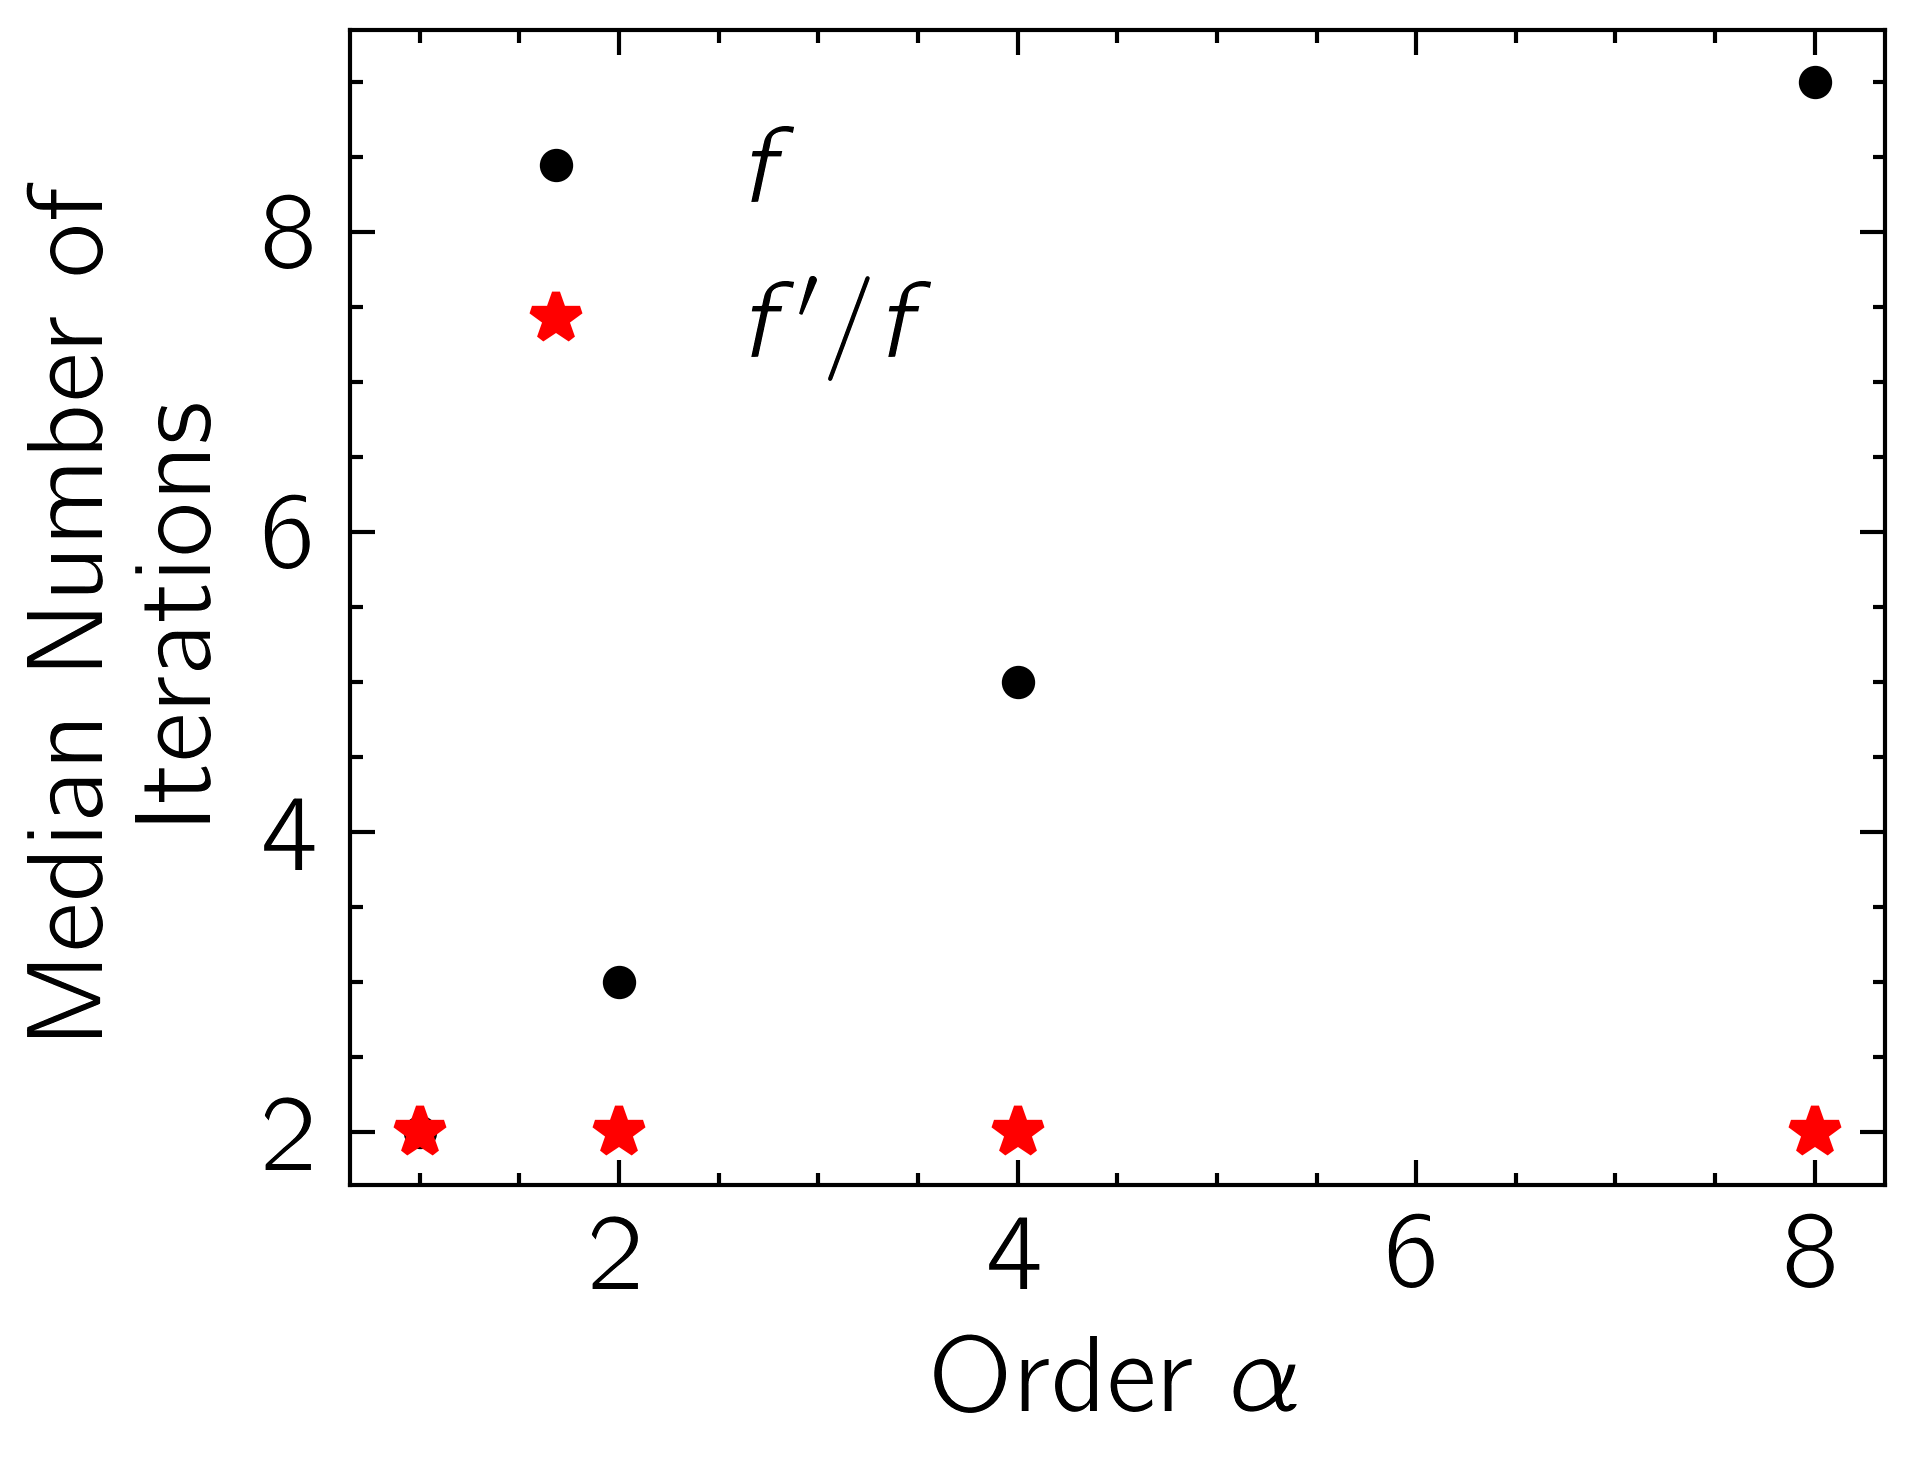

In [8]:
fig, ax = plt.subplots()
ax.plot(orders, np.median(f_iterations, axis=1), '.', label=r"$f$")
ax.plot(orders, np.median(log_deriv_iterations, axis=1), '*', label=r"$f^\prime/f$")
ax.set_xlabel(rf"Order $\alpha$")
ax.set_ylabel("Median Number of\nIterations")
ax.legend()
plt.savefig("figures/AAA_function_choice_iterations_zero.pdf")